In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create


In [2]:
# Read in data
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [5]:
df = df.dropna(how='any',axis=0) 

In [6]:
# check for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {:.2f}%".format(col, pct_missing))

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.00%
gross - 0.00%
company - 0.00%
runtime - 0.00%
yearcorrect - 0.00%


In [7]:
# print out the column data types
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect     object
dtype: object

In [8]:
# Sort the column header
df.sort_index(axis=1,inplace =True)
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000.0,Columbia Pictures,United States,Adil El Arbi,Action,426505244.0,Bad Boys for Life,R,"January 17, 2020 (United States)",124.0,6.6,Will Smith,140000.0,Peter Craig,2020,2020
7649,85000000.0,Paramount Pictures,United States,Jeff Fowler,Action,319715683.0,Sonic the Hedgehog,PG,"February 14, 2020 (United States)",99.0,6.5,Ben Schwartz,102000.0,Pat Casey,2020,2020
7650,175000000.0,Universal Pictures,United States,Stephen Gaghan,Adventure,245487753.0,Dolittle,PG,"January 17, 2020 (United States)",101.0,5.6,Robert Downey Jr.,53000.0,Stephen Gaghan,2020,2020
7651,135000000.0,20th Century Studios,Canada,Chris Sanders,Adventure,111105497.0,The Call of the Wild,PG,"February 21, 2020 (United States)",100.0,6.8,Harrison Ford,42000.0,Michael Green,2020,2020


In [9]:
# change data type of columns
df['budget']= df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
df.dtypes

budget           int64
company         object
country         object
director        object
genre           object
gross            int64
name            object
rating          object
released        object
runtime        float64
score          float64
star            object
votes          float64
writer          object
year             int64
yearcorrect     object
dtype: object

In [11]:
# sort the value based on gross column
df = df.sort_values(by=['gross'],inplace=False,ascending=False)


In [12]:
pd.set_option('display.max_rows',None)

In [13]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


In [14]:
# Drop any duplicates
df = df.drop_duplicates()

### Budget high correlation
### company high correlation

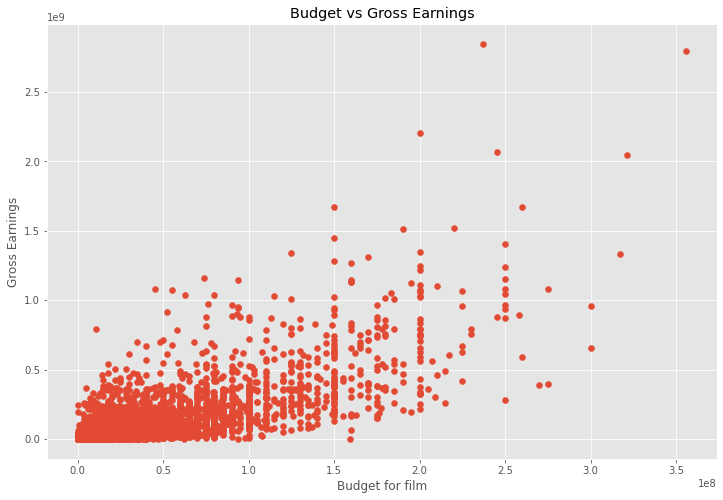

In [15]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

In [16]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


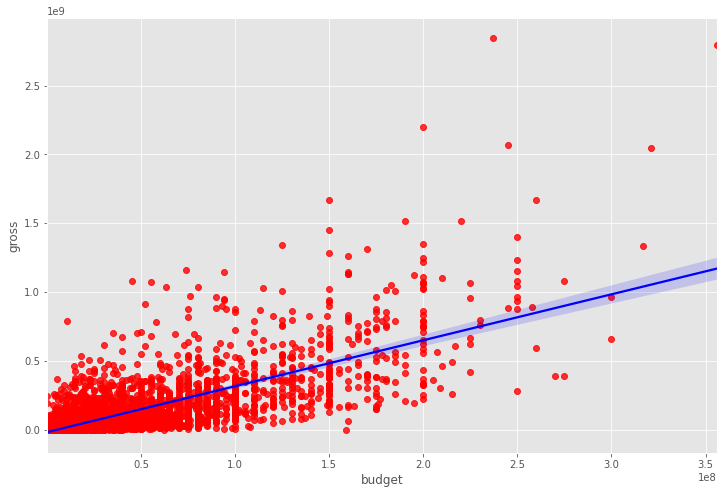

In [17]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws ={'color':'red'}, line_kws={'color':'blue'}) 
plt.show()

In [18]:
# looking at correlation
df.corr(method='pearson') #pearson, kendall, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000


### There is a high correlation between budget and gross


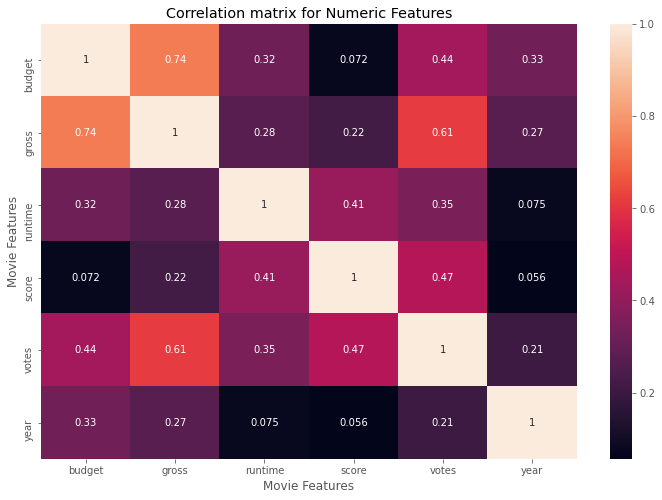

In [19]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
# look at company
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009 (United States)",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019 (United States)",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997 (United States)",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015 (United States)",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018 (United States)",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018


In [21]:
df_nummerized = df

for col_name in df_nummerized.columns:
    if(df_nummerized[col_name].dtype =='object'):
        df_nummerized[col_name] = df_nummerized[col_name].astype('category')
        df_nummerized[col_name] = df_nummerized[col_name].cat.codes
        
df_nummerized.head()
        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
5445,237000000,1382,47,785,0,2847246203,386,5,527,162.0,7.8,1534,1100000.0,1263,2009,29
7445,356000000,983,47,105,0,2797501328,388,5,137,181.0,8.4,1470,903000.0,513,2019,39
3045,200000000,1382,47,785,6,2201647264,4909,5,534,194.0,7.8,1073,1100000.0,1263,1997,17
6663,245000000,945,47,768,0,2069521700,3643,5,529,138.0,7.8,356,876000.0,1806,2015,35
7244,321000000,983,47,105,0,2048359754,389,5,145,149.0,8.4,1470,897000.0,513,2018,38


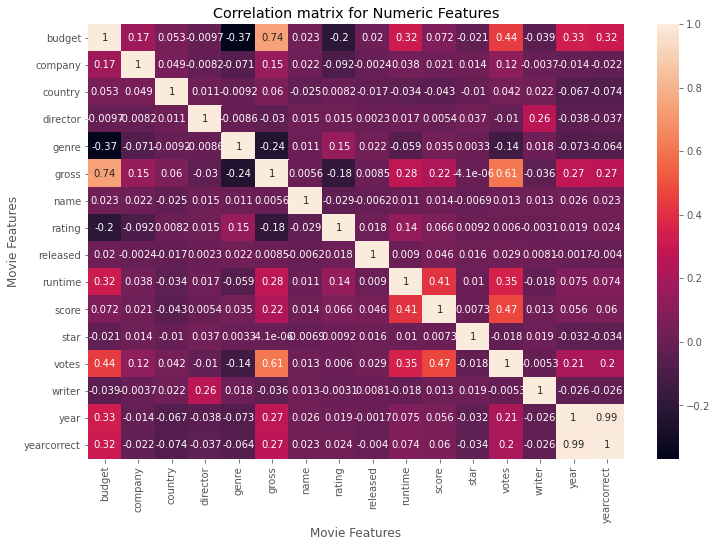

In [22]:
correlation_matrix = df_nummerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [23]:
correlation_mat = df_nummerized.corr()
corr_pairs = correlation_mat.unstack().sort_values()
corr_pairs

genre        budget        -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
gross        genre         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.074422
yearcorrect  country       -0.074422
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
year         country       -0.066748
country      year          -0.066748
genre        yearcorrect   -0.064308
yearcorrect  genre         -0.064308
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
writer       budget        -0.039466
b

In [24]:
high_corr = corr_pairs[(corr_pairs) > 0.5]
high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  year           0.990417
year         yearcorrect    0.990417
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

### Votes and budgets have the highest correlation to gross earning. Company column has low correlation